# Readme

1. Upload NDVI image files from each year.
2. Make Upland Forest coordinate dataframe
3. Make single NDVI image into NDVI coordinate dataframe and plot
4. Make all NDVI images and compile into time progression GIF
5. Extract NDVI time series values for single coordinates
6. Calculate standard deviation across 5 years for each coordinate

# Importing libraries

In [2]:
import xarray as xr 
import pandas as pd
import numpy as np
from shapely import wkt
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt
import rioxarray as rxr
import rasterio as rio
from shapely import wkt
from shapely.geometry import Point
import imageio.v2 as imageio  # For gif creation
import os
from IPython.display import display, Image
from statistics import stdev, pstdev
from scipy.stats import kendalltau
import seaborn as sns

In [3]:
#load file 
num_files1 = 5
num_files2 = 5
file_name_list = []
image_years = []
file_path = '/home/jovyan/sara_typrin/ndvi_landsat/data/ndvi_landsat/ndvi_landsat_'

for i in range(num_files1):
    n = i + 4
    file_name_list.append(file_path + '201' + str(n) + '.tif')
    image_years.append('201' + str(n))

for j in range(num_files2):
    file_name_list.append(file_path + '202' + str(j) + '.tif')
    image_years.append('202' + str(j))

print('Filenames: ', file_name_list)

ndvi_landsat = [xr.open_dataset(fn) for fn in file_name_list]

print(len(ndvi_landsat))
print(image_years)
#new_file = xr.open_dataset('/home/jovyan/sara_typrin/ndvi_landsat/data/ndvi_landsat/ndvi_landsat_2024.tif')

Filenames:  ['/home/jovyan/sara_typrin/ndvi_landsat/data/ndvi_landsat/ndvi_landsat_2014.tif', '/home/jovyan/sara_typrin/ndvi_landsat/data/ndvi_landsat/ndvi_landsat_2015.tif', '/home/jovyan/sara_typrin/ndvi_landsat/data/ndvi_landsat/ndvi_landsat_2016.tif', '/home/jovyan/sara_typrin/ndvi_landsat/data/ndvi_landsat/ndvi_landsat_2017.tif', '/home/jovyan/sara_typrin/ndvi_landsat/data/ndvi_landsat/ndvi_landsat_2018.tif', '/home/jovyan/sara_typrin/ndvi_landsat/data/ndvi_landsat/ndvi_landsat_2020.tif', '/home/jovyan/sara_typrin/ndvi_landsat/data/ndvi_landsat/ndvi_landsat_2021.tif', '/home/jovyan/sara_typrin/ndvi_landsat/data/ndvi_landsat/ndvi_landsat_2022.tif', '/home/jovyan/sara_typrin/ndvi_landsat/data/ndvi_landsat/ndvi_landsat_2023.tif', '/home/jovyan/sara_typrin/ndvi_landsat/data/ndvi_landsat/ndvi_landsat_2024.tif']
10
['2014', '2015', '2016', '2017', '2018', '2020', '2021', '2022', '2023', '2024']


# Making Upland Forest Coordinate Dataframe

### Upload upland_forest_list_subset file

In [5]:
file_name = '/home/jovyan/sara_typrin/landcover/data/upland_forest_list_subset.csv'
# Read each CSV into a list of DataFrames
upland_forest_dfs = pd.read_csv(file_name) 

print(len(upland_forest_dfs))

583995


In [6]:
upland_forest_dfs['point']

0          POINT (-76.34073656944743 38.6739655179992)
1         POINT (-76.34038674669645 38.67369918873219)
2         POINT (-76.34003188678642 38.67316257660434)
3         POINT (-76.20211555033754 38.67466160674739)
4          POINT (-76.2017707468719 38.67466515058795)
                              ...                     
583990     POINT (-75.6906159919293 38.19944852691961)
583991    POINT (-75.68958818839741 38.19945456839031)
583992    POINT (-75.68856038455816 38.19946060086436)
583993     POINT (-75.68821778321019 38.1994626096898)
583994    POINT (-75.68444916613683 38.19948464079413)
Name: point, Length: 583995, dtype: object

### Convert point string to point object.

In [7]:
upland_forest_dfs['point'] = upland_forest_dfs['point'].apply(wkt.loads)

## Extracting latitude-longitude information

In [8]:
lat = [None] * len( upland_forest_dfs['point'])
lon = [None] * len( upland_forest_dfs['point'])

Extracting latitude-longitude information from a Point in a geodataframe

In [9]:
lat = [None] * len( upland_forest_dfs['point'])
lon = [None] * len( upland_forest_dfs['point'])

for i in range (0, len( upland_forest_dfs['point'])):
    lon[i] = upland_forest_dfs['point'][i].x
    lat[i] = upland_forest_dfs['point'][i].y

In [10]:
coords_df = pd.DataFrame({
    'lat': lat,
    'lon': lon
})

In [11]:
coords_df

,lat,lon
0,38.673966,-76.340737
1,38.673699,-76.340387
2,38.673163,-76.340032
3,38.674662,-76.202116
4,38.674665,-76.201771
...,...,...
583990,38.199449,-75.690616
583991,38.199455,-75.689588
583992,38.199461,-75.688560
583993,38.199463,-75.688218


## Making NDVI images into NDVI and coordinate dataframe and making GIF

## Procedure for one image:

In [11]:
# ndvi_landsat[0]

In [12]:
# data = ndvi_landsat[0].band_data.values

# data

In [13]:
# mask = np.isfinite(data)   # True for non-NaN values
# #mask

In [14]:
# points = np.argwhere(mask)  # Find the indices of array elements that are non-zero, grouped by element. 
# #points

In [15]:
# points = np.transpose(np.nonzero(mask)) #shape (N, 3): [d_index, x_index, y_index]
# #points

In [16]:
# da_ndvi = ndvi_landsat[0].rio.reproject("EPSG:4326")
# lon, lat = np.meshgrid(da_ndvi.x, da_ndvi.y)
# # da_ndvi.band_datalon, lat = np.meshgrid(da_ndvi.x, da_ndvi.y)
# lon = lon.flatten()
# lat = lat.flatten()


In [17]:
# d_inds, lat, lon = points.T 

In [18]:
# values = data[mask]  #ndvi values (mask = True)   
# #values

In [19]:
# plt.figure(figsize=(8, 6))
# fig = plt.scatter(lat, lon, c=values, cmap='viridis', s=10)
# plt.colorbar(label='NDVI')
# plt.xlabel('Latitude')
# plt.ylabel('Longitude')
# plt.title('2014 NDVI in Blackwater Wildlige Refuge')
# plt.gca().invert_yaxis()
# plt.show() 
# plt.savefig('/home/jovyan/sara_typrin/ndvi_landsat/figures/ndvi_image_plot.png')  # Save with filename

## Procedure for all images:

### Set uniform color axis across all frames

In [9]:
# Step 1: Compute global NDVI min/max
ndvi_min = float('inf')
ndvi_max = float('-inf')

for i in range(len(ndvi_landsat[9])):
    try:
        data = ndvi_landsat[i].band_data.values
        mask = np.isfinite(data)
        values = data[mask]
        ndvi_min = min(ndvi_min, values.min())
        ndvi_max = max(ndvi_max, values.max())
    except Exception as e:
        print(f"Skipping index {i} during min/max calc: {e}")
        continue

print(f"Global NDVI range: {ndvi_min:.3f} to {ndvi_max:.3f}")

Global NDVI range: -0.999 to 0.996


In [13]:
# image_paths = []

for i in range(len(ndvi_landsat)):
    i=9
    data = ndvi_landsat[i].band_data.values
    mask = np.isfinite(data)   
    points = np.argwhere(mask)
    points = np.transpose(np.nonzero(mask))
    
    da_ndvi = ndvi_landsat[i].rio.reproject("EPSG:4326")
    lon, lat = np.meshgrid(da_ndvi.x, da_ndvi.y)
    # da_ndvi.band_datalon, lat = np.meshgrid(da_ndvi.x, da_ndvi.y)
    lon = lon.flatten()
    lat = lat.flatten()
    d_inds, lat, lon = points.T  

    values = data[mask]
    
    # Plot
    plt.figure(figsize=(8, 6))
    fig = plt.scatter(lon, lat, c=values, cmap='viridis', s=10,
                            vmin=ndvi_min, vmax=ndvi_max)  # Fixed color scale    plt.colorbar(label='NDVI')
    plt.colorbar(fig, label='NDVI', )
    plt.xlabel('Latitude',  fontsize=16)
    plt.ylabel('Longitude',  fontsize=16)
    plt.title(image_years[i] + ' NDVI in Blackwater Wildlife Refuge',  fontsize=20)
    plt.gca().invert_yaxis()
    #plt.show() 
    # Save frame
    img_path = f'/home/jovyan/sara_typrin/ndvi_landsat/figures/ndvi_frame_{i}.png'
    plt.savefig(img_path)
    plt.close()

    # image.append(img_path)

NameError: name 'image' is not defined

In [28]:
image_paths = []

for i in range(len(ndvi_landsat)):
    image_paths.append(f'/home/jovyan/sara_typrin/ndvi_landsat/figures/ndvi_frame_{i}.png')

print("Frames used:", len(image_paths))
print(image_paths)

Frames used: 10
['/home/jovyan/sara_typrin/ndvi_landsat/figures/ndvi_frame_0.png', '/home/jovyan/sara_typrin/ndvi_landsat/figures/ndvi_frame_1.png', '/home/jovyan/sara_typrin/ndvi_landsat/figures/ndvi_frame_2.png', '/home/jovyan/sara_typrin/ndvi_landsat/figures/ndvi_frame_3.png', '/home/jovyan/sara_typrin/ndvi_landsat/figures/ndvi_frame_4.png', '/home/jovyan/sara_typrin/ndvi_landsat/figures/ndvi_frame_5.png', '/home/jovyan/sara_typrin/ndvi_landsat/figures/ndvi_frame_6.png', '/home/jovyan/sara_typrin/ndvi_landsat/figures/ndvi_frame_7.png', '/home/jovyan/sara_typrin/ndvi_landsat/figures/ndvi_frame_8.png', '/home/jovyan/sara_typrin/ndvi_landsat/figures/ndvi_frame_9.png']


In [32]:
image_paths

frames = []

# Load each file into a list
filenames = image_paths

for filename in filenames:
    if filename.endswith(".png"):
        print(filename)
        frames.append(imageio.imread(filename))


# # Save them as frames into a gif 
# exportname = "figures/output.gif"
# kargs = { 'duration': 10000 }
# kargs = { 'loop': 1 }
# imageio.mimsave(exportname, frames, loop = 1000)
# #, **kargs)

import imageio

# Define the export name and parameters
export_name = "figures/output.gif"
kargs = {
    'duration': 5.0,  # Duration in seconds for each frame
    'loop': 0         # Loop indefinitely
}

# Save the frames as a GIF
imageio.mimsave(export_name, frames, **kargs)

/home/jovyan/sara_typrin/ndvi_landsat/figures/ndvi_frame_0.png
/home/jovyan/sara_typrin/ndvi_landsat/figures/ndvi_frame_1.png
/home/jovyan/sara_typrin/ndvi_landsat/figures/ndvi_frame_2.png
/home/jovyan/sara_typrin/ndvi_landsat/figures/ndvi_frame_3.png
/home/jovyan/sara_typrin/ndvi_landsat/figures/ndvi_frame_4.png
/home/jovyan/sara_typrin/ndvi_landsat/figures/ndvi_frame_5.png
/home/jovyan/sara_typrin/ndvi_landsat/figures/ndvi_frame_6.png
/home/jovyan/sara_typrin/ndvi_landsat/figures/ndvi_frame_7.png
/home/jovyan/sara_typrin/ndvi_landsat/figures/ndvi_frame_8.png
/home/jovyan/sara_typrin/ndvi_landsat/figures/ndvi_frame_9.png


/tmp/ipykernel_259/1012967667.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))


In [31]:
import imageio

frames = []
for fn in image_paths:
    if fn.lower().endswith(".png"):
        print(fn)
        frames.append(imageio.imread(fn))

exportname = "figures/output2.gif"

# Speed control options:
duration = 10            # display each frame for 0.1 seconds
# fps = 10                # alternate: show 10 frames per second

imageio.mimsave(
    exportname,
    frames,
    loop=0,               # 0 = infinite loop, adjust as needed
    duration=duration,   # use duration OR fps, not both
    format="GIF"
)

/home/jovyan/sara_typrin/ndvi_landsat/figures/ndvi_frame_0.png
/home/jovyan/sara_typrin/ndvi_landsat/figures/ndvi_frame_1.png
/home/jovyan/sara_typrin/ndvi_landsat/figures/ndvi_frame_2.png
/home/jovyan/sara_typrin/ndvi_landsat/figures/ndvi_frame_3.png
/home/jovyan/sara_typrin/ndvi_landsat/figures/ndvi_frame_4.png
/home/jovyan/sara_typrin/ndvi_landsat/figures/ndvi_frame_5.png
/home/jovyan/sara_typrin/ndvi_landsat/figures/ndvi_frame_6.png
/home/jovyan/sara_typrin/ndvi_landsat/figures/ndvi_frame_7.png
/home/jovyan/sara_typrin/ndvi_landsat/figures/ndvi_frame_8.png
/home/jovyan/sara_typrin/ndvi_landsat/figures/ndvi_frame_9.png


/tmp/ipykernel_259/138106481.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(fn))


## Extracting coordinate values from images

### Procedure for one image: 

#### Reproject the first image (2024) to have lat-lon coordinates.

In [12]:
da_ndvi = ndvi_landsat[0].rio.reproject("EPSG:4326")
# da_ndvi.band_data

#### Define x and y values of image as lon and lat.

In [13]:
lon, lat = np.meshgrid(da_ndvi.x, da_ndvi.y)
lon = lon.flatten()
lat = lat.flatten()
#lon, lat
ndvi = da_ndvi.band_data.values.flatten()

#### Create dataframe for each pixel's lat, lon, and ndvi value.

In [14]:
# Create dataframe and drop NaNs
ndvi_df = pd.DataFrame({
    'lon': lon,
    'lat': lat,
    'ndvi': ndvi}).dropna()

#### Round lat and on values to the 4th decimal place to enable matching 

In [15]:
coords_df["lat"] = coords_df["lat"].round(4)
coords_df["lon"] = coords_df["lon"].round(4)

ndvi_df["lat"] = ndvi_df["lat"].round(4)
ndvi_df["lon"] = ndvi_df["lon"].round(4)

#### Produce a dataframe that has lat, lon and ndvi only for the lat-lon values in coords_df (upland forest coordinates). There are 79222 upland forest coordinates for each image 

In [16]:
matched = pd.merge(coords_df, ndvi_df, on=["lat", "lon"], how="inner")    
#matched
print(len(matched))

75119


### Procedure for one image looped over all images: 

In [17]:
matched_coords = []
for i in range(len(image_years)):
    da_ndvi = ndvi_landsat[i].rio.reproject("EPSG:4326")
    # da_ndvi.band_data
    lon, lat = np.meshgrid(da_ndvi.x, da_ndvi.y)
    lon = lon.flatten()
    lat = lat.flatten()
    #lon, lat
    ndvi = da_ndvi.band_data.values.flatten()
    # Create dataframe and drop NaNs
    ndvi_df = pd.DataFrame({
    'lon': lon,
    'lat': lat,
    'ndvi': ndvi,
    'date': image_years[i]}).dropna()

    coords_df["lat"] = coords_df["lat"].round(4)
    coords_df["lon"] = coords_df["lon"].round(4)
    ndvi_df["lat"] = ndvi_df["lat"].round(4)
    ndvi_df["lon"] = ndvi_df["lon"].round(4)

    matched = pd.merge(coords_df, ndvi_df, on=["lat", "lon"])
    matched_coords.append(matched)
    #print("the coordinates for image", [i], "is", matched)

In [18]:
print(len(matched_coords[0]))

75119


In [19]:
len(matched_coords)

10

In [20]:
for i in range(9):
    print(len(matched_coords[i]))

75119
79222
79222
79198
78983
79146
79222
79222
79222


In [21]:
#len(matched_coords)
#combined_matched_coords = []
combined_matched_coords = pd.concat(matched_coords)
#for i in matched_coords:
    #combined_matched_coords.merge(matched_coords[i])
#This is the sum of all the coordinates in every image
print(len(combined_matched_coords))

749419


In [22]:
# Group dataframe by lon & lat and create a list of dicts or tuples
for i in range(len(image_years)):
    records = ({
        'lon': lon,
        'lat': lat,
        'ndvi': ndvi,
        'date': image_years[i]})

In [20]:
len(records)

4

In [37]:
#combined_matched_coords['year'] = combined_matched_coords['date'].dt.year

In [23]:
# Group by coordinates and collect all NDVI samples (with date)
coordinate_groups = combined_matched_coords.groupby(['lon', 'lat']).apply(
    lambda g: g[['date', 'ndvi']].sort_values('date').to_dict('records')
).reset_index(name='samples')

/tmp/ipykernel_150/1904451229.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  coordinate_groups = combined_matched_coords.groupby(['lon', 'lat']).apply(


In [24]:
len(coordinate_groups)

79222

In [25]:
coordinate_groups

,lon,lat,samples
0,-76.3407,38.6740,"[{'date': '2015', 'ndvi': 0.8236755728721619},..."
1,-76.3404,38.6737,"[{'date': '2015', 'ndvi': 0.849772036075592}, ..."
2,-76.3312,38.4748,"[{'date': '2014', 'ndvi': 0.7130529284477234},..."
3,-76.3312,38.4751,"[{'date': '2014', 'ndvi': 0.7085577249526978},..."
4,-76.3310,38.4813,"[{'date': '2014', 'ndvi': 0.6805872321128845},..."
...,...,...,...
79217,-75.6842,38.2495,"[{'date': '2014', 'ndvi': 0.8726248145103455},..."
79218,-75.6842,38.5691,"[{'date': '2014', 'ndvi': 0.8857778906822205},..."
79219,-75.6842,38.5699,"[{'date': '2014', 'ndvi': 0.8815193176269531},..."
79220,-75.6842,38.5702,"[{'date': '2014', 'ndvi': 0.8779897689819336},..."


In [26]:
samples = coordinate_groups.loc[9].samples

date = [sample['date'] for sample in samples]
ndvi_values = [sample['ndvi'] for sample in samples]

samples_df = pd.DataFrame({
    'date': date,
    'ndvi': ndvi_values
})

In [33]:
len(ndvi_values)

10

In [27]:
# Calculating Kendall Rank correlation
corr, _ = kendalltau(samples_df.date, samples_df.ndvi)
print('Kendall Rank correlation: %.5f' % corr)

Kendall Rank correlation: -0.68889


[0.022135019302368164, 0.01454097032546997, 0.04131436347961426, 0.01731574535369873, 0.046398162841796875, 0.02320992946624756, 0.03587067127227783, 0.07015424966812134, 0.03183645009994507]
Kendall Rank correlation: 0.38889


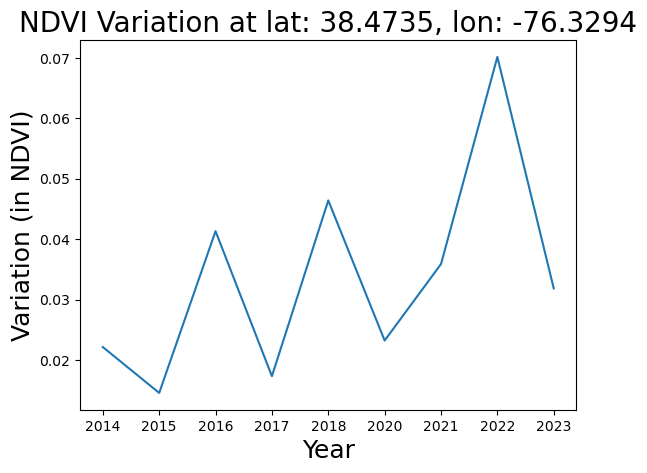

In [29]:
difference_list = []
for i in range(len(samples_df.ndvi)-1):
    j=i+1
    difference = abs(samples_df.ndvi[j] - samples_df.ndvi[i])
    difference_list.append(difference)

print(difference_list)

# Calculating Kendall Rank correlation for std 
corr, _ = kendalltau(samples_df.date[:len(difference_list)], difference_list)
print('Kendall Rank correlation: %.5f' % corr)

plt.xlabel('Year', fontsize = 18)
plt.ylabel('Variation (in NDVI)', fontsize = 18)
plt.title(f"NDVI Variation at lat: {coordinate_groups.loc[9].lat}, lon: {coordinate_groups.loc[9].lon}", fontsize = 20)
plt.plot(samples_df.date[:len(difference_list)],difference_list)
plt.savefig('/home/jovyan/sara_typrin/ndvi_landsat/figures/variation_year.png')

In [46]:
# data1 = samples_df.ndvi[:3]
# data2 = samples_df.ndvi[3:7]

# #sample_stddev = stdev(data1)  # Sample standard deviation
# population_stddev1 = pstdev(data1)  # Population standard deviation
# print(pstdev(data1))
# population_stddev2 = pstdev(data2)  # Population standard deviation
# print(pstdev(data2))

# std = [population_stddev1, population_stddev2]
# date = [2014, 2024]

In [47]:
coordinate_groups.loc[12].lat

38.474

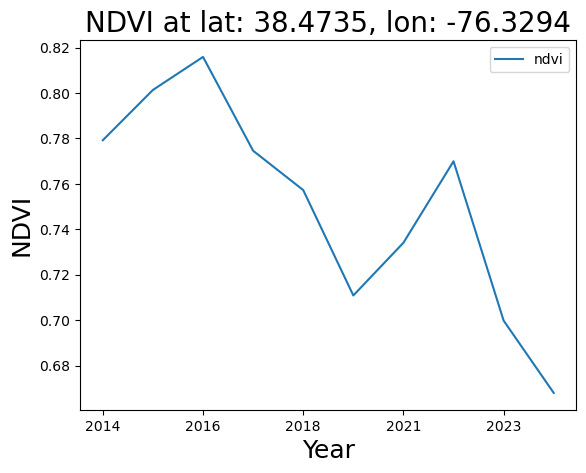

In [36]:
samples_df.plot(x = 'date', y='ndvi')
plt.xlabel('Year', fontsize = 18)
plt.ylabel('NDVI', fontsize = 18)
plt.title(f"NDVI at lat: {coordinate_groups.loc[9].lat}, lon: {coordinate_groups.loc[9].lon}", fontsize=20)
plt.savefig('/home/jovyan/sara_typrin/ndvi_landsat/figures/ndvi_plot_year.png')

## Make a dataframe for all coordinates

In [49]:
all_metrics_df = []
for i in range(len(coordinate_groups)):
    
    samples = coordinate_groups.loc[i].samples
    lat = coordinate_groups.loc[i].lat
    lon = coordinate_groups.loc[i].lon

    date = [sample['date'] for sample in samples]
    ndvi_values = [sample['ndvi'] for sample in samples]

    samples_df = pd.DataFrame({
        'date': date,
        'ndvi': ndvi_values
    })

    # Calculating Kendall Rank correlation for NDVI trend 
    ndvi_corr, _ = kendalltau(samples_df.date, samples_df.ndvi)
    #print('NDVI Kendall Rank correlation: %.5f' % ndvi_corr)

    difference_list = []
    for j in range(len(samples_df.ndvi)-1):
        difference = abs(samples_df.ndvi[j+1] - samples_df.ndvi[j])
        difference_list.append(difference)
        
    # Calculating Kendall Rank correlation for std 
    var_corr, _ = kendalltau(samples_df.date[:len(difference_list)], difference_list)
    #print('Variation Kendall Rank correlation: %.5f' % var_corr)

    # Append row as a dictionary
    all_metrics_df.append({
        'lat': lat,
        'lon': lon,
        'ndvi trend': ndvi_corr,
        'variation trend': var_corr
    })

# Final DataFrame
all_metrics_df = pd.DataFrame(all_metrics_df)
print(all_metrics_df)

           lat      lon  ndvi trend  variation trend
0      38.6740 -76.3407    0.055556        -0.285714
1      38.6737 -76.3404   -0.555556         0.071429
2      38.4748 -76.3312    0.200000         0.055556
3      38.4751 -76.3312    0.333333         0.222222
4      38.4813 -76.3310   -0.333333        -0.111111
...        ...      ...         ...              ...
79217  38.2495 -75.6842    0.111111        -0.571429
79218  38.5691 -75.6842    0.000000         0.071429
79219  38.5699 -75.6842    0.222222         0.071429
79220  38.5702 -75.6842    0.166667         0.357143
79221  38.5707 -75.6842    0.277778         0.214286

[79222 rows x 4 columns]


In [51]:
all_metrics_df

,lat,lon,ndvi trend,variation trend
0,38.6740,-76.3407,0.055556,-0.285714
1,38.6737,-76.3404,-0.555556,0.071429
2,38.4748,-76.3312,0.200000,0.055556
3,38.4751,-76.3312,0.333333,0.222222
4,38.4813,-76.3310,-0.333333,-0.111111
...,...,...,...,...
79217,38.2495,-75.6842,0.111111,-0.571429
79218,38.5691,-75.6842,0.000000,0.071429
79219,38.5699,-75.6842,0.222222,0.071429
79220,38.5702,-75.6842,0.166667,0.357143


In [52]:
all_metrics_df['ndvi trend'][1]

-0.5555555555555556

### Sort coordinates into scenarios

In [53]:
m_recovery = (all_metrics_df['ndvi trend'] > 0) & (all_metrics_df['variation trend'] > 0)
m_stable   = (all_metrics_df['ndvi trend'] > 0) & (all_metrics_df['variation trend'] < 0)
m_abrupt   = (all_metrics_df['ndvi trend'] < 0) & (all_metrics_df['variation trend'] > 0)
m_gradual  = (all_metrics_df['ndvi trend'] < 0) & (all_metrics_df['variation trend'] < 0)

recovery = all_metrics_df[m_recovery]
stable   = all_metrics_df[m_stable]
abrupt   = all_metrics_df[m_abrupt]
gradual  = all_metrics_df[m_gradual]

print(recovery.head())

        lat      lon  ndvi trend  variation trend
2   38.4748 -76.3312    0.200000         0.055556
3   38.4751 -76.3312    0.333333         0.222222
7   38.4751 -76.3302    0.244444         0.055556
8   38.4759 -76.3302    0.066667         0.444444
32  38.4716 -76.3256    0.022222         0.166667


In [54]:
recovery_df = pd.DataFrame({
    'lat': recovery.lat,
    'lon': recovery.lon
})

stable_df = pd.DataFrame({
    'lat': stable.lat,
    'lon': stable.lon
})

gradual_df = pd.DataFrame({
    'lat': gradual.lat,
    'lon': gradual.lon
})

abrupt_df = pd.DataFrame({
    'lat': abrupt.lat,
    'lon': abrupt.lon
})



In [55]:
recovery_df.to_csv('recovery_df.csv', index=False)
stable_df.to_csv('stable_df.csv', index=False)
gradual_df.to_csv('gradual_df.csv', index=False)
abrupt_df.to_csv('abrupt_df.csv', index=False)

In [56]:
abrupt_gdf = gpd.GeoDataFrame(
    abrupt,
    geometry=gpd.points_from_xy(abrupt.lon, abrupt.lat),
    crs="EPSG:4326"
)

abrupt_points = abrupt_gdf.geometry

recovery_gdf = gpd.GeoDataFrame(
    recovery,
    geometry=gpd.points_from_xy(recovery.lon, recovery.lat),
    crs="EPSG:4326"
)

recovery_points = recovery_gdf.geometry

stable_gdf = gpd.GeoDataFrame(
    stable,
    geometry=gpd.points_from_xy(stable.lon, stable.lat),
    crs="EPSG:4326"
)

stable_points = stable_gdf.geometry

gradual_gdf = gpd.GeoDataFrame(
    gradual,
    geometry=gpd.points_from_xy(gradual.lon, gradual.lat),
    crs="EPSG:4326"
)

gradual_points = gradual_gdf.geometry

In [57]:
gradual_points

4         POINT (-76.331 38.4813)
6        POINT (-76.3302 38.4748)
12        POINT (-76.3291 38.474)
13       POINT (-76.3291 38.4743)
14       POINT (-76.3291 38.4751)
                   ...           
79162    POINT (-75.6858 38.3436)
79166    POINT (-75.6858 38.5664)
79172    POINT (-75.6855 38.5664)
79188    POINT (-75.6847 38.2646)
79207    POINT (-75.6845 38.5656)
Name: geometry, Length: 19523, dtype: geometry

### Save forest pathway lists as csv files
This step is not recessasary if you already have them saved

In [58]:
# recovery_points.to_csv('recovery.csv', index=False)
# stable_points.to_csv('stable.csv', index=False)
# gradual_points.to_csv('gradual.csv', index=False)
# abrupt_points.to_csv('abrupt.csv', index=False)

# Pie Chart Distribution

In [3]:
pathways = ['Stable', 'Recovery', 'Gradual',
        'Abrupt']

data = [len(stable), len(recovery), len(gradual), len(abrupt)]

colors = [sns.color_palette("pastel")[0], sns.color_palette("pastel")[2], sns.color_palette("pastel")[1], sns.color_palette("pastel")[3]]
# Creating plot
fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=pathways,  colors = colors, textprops={'fontsize': 18}, autopct='%.1f%%');
values = pd.Series([False, False, True, True])
v_counts = values.value_counts()
fig = plt.figure()
# show plot
plt.show()
plt.savefig('/home/jovyan/sara_typrin/ndvi_landsat/figures/pie_chart.png')

NameError: name 'plt' is not defined